In [22]:
import pandas as pd

In [24]:
df = pd.read_csv('Bank Customer Churn Prediction.csv')

In [26]:
df.shape

(10000, 12)

In [28]:
df.head(10)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [29]:
for col in df.columns:
    print(col)

customer_id
credit_score
country
gender
age
tenure
balance
products_number
credit_card
active_member
estimated_salary
churn


In [30]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [31]:
df.nunique()

customer_id         10000
credit_score          460
country                 3
gender                  2
age                    70
tenure                 11
balance              6382
products_number         4
credit_card             2
active_member           2
estimated_salary     9999
churn                   2
dtype: int64

In [32]:
df = df.drop(["customer_id"], axis = 1)

In [33]:
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [34]:
df.dtypes

credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [35]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

l = list(df.select_dtypes(include=['object']).columns)
df[l]  = df[l].apply(lb.fit_transform)
df.head(5)

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [36]:
Y = df['churn']
X = df.drop('churn', axis=1)

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)


In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
from sklearn.ensemble import GradientBoostingClassifier

GR = GradientBoostingClassifier()
GR.fit(X_train,Y_train)

GradientBoostingClassifier()

In [40]:
GR.decision_function(X_test)

array([-2.37280510e+00, -3.25698196e-01, -5.68135946e-01, ...,
       -2.71143665e-03, -2.83860505e+00, -1.10441931e+00])

In [41]:
from sklearn.metrics import roc_curve, auc
roc = roc_curve(Y_test, GR.decision_function(X_test))
res = auc(roc[0], roc[1])

<AxesSubplot:>

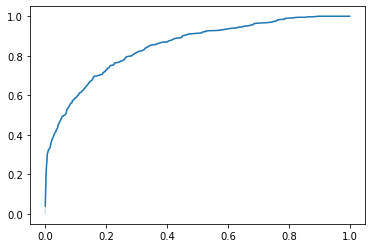

In [42]:
import seaborn as sns
sns.lineplot(x=roc[0], y=roc[1])

In [43]:
Y_pred = GR.predict(X_test)

In [44]:
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve
print(f"{confusion_matrix(Y_test,Y_pred)}")

[[1570   47]
 [ 229  154]]


In [45]:
from sklearn.metrics import accuracy_score,precision_recall_fscore_support
accuracy_score(Y_test,Y_pred)

0.862

In [46]:
result =[]
for lr in [0.05, 0.1, 0.25, 0.5, 0.75, 1]:
    GR = GradientBoostingClassifier(learning_rate=lr)
    GR.fit(X_train,Y_train)
    Y_ped = GR.predict(X_test)
    pr,re,fs,sp = precision_recall_fscore_support(Y_test,Y_pred)
    probs = GR.decision_function(X_test)
  
    result_local = {   
    'learning_rate': lr,
    'roc'  :roc_curve(Y_test,probs ),
    'auc' : roc_auc_score(Y_test, probs) ,
    'confusion_matrix' : confusion_matrix(Y_test,Y_pred),
    'accuracy_score' : accuracy_score(Y_test,Y_pred),
    'precision':pr,
    'recall':re,
    'fscore':fs,
    'support':sp
     }
    result.append(result_local)

In [47]:
ressult_df = pd.DataFrame(result)
ressult_df


,learning_rate,roc,auc,confusion_matrix,accuracy_score,precision,recall,fscore,support
0,0.05,"([0.0, 0.0, 0.0, 0.0006184291898577613, 0.0006...",0.849068,"[[1570, 47], [229, 154]]",0.862,"[0.8727070594774875, 0.7661691542288557]","[0.9709338280766853, 0.402088772845953]","[0.9192037470725996, 0.5273972602739726]","[1617, 383]"
1,0.10,"([0.0, 0.0, 0.0, 0.0012368583797155227, 0.0012...",0.848750,"[[1570, 47], [229, 154]]",0.862,"[0.8727070594774875, 0.7661691542288557]","[0.9709338280766853, 0.402088772845953]","[0.9192037470725996, 0.5273972602739726]","[1617, 383]"
2,0.25,"([0.0, 0.0, 0.0, 0.0006184291898577613, 0.0006...",0.842115,"[[1570, 47], [229, 154]]",0.862,"[0.8727070594774875, 0.7661691542288557]","[0.9709338280766853, 0.402088772845953]","[0.9192037470725996, 0.5273972602739726]","[1617, 383]"
3,0.50,"([0.0, 0.0, 0.0012368583797155227, 0.001236858...",0.839349,"[[1570, 47], [229, 154]]",0.862,"[0.8727070594774875, 0.7661691542288557]","[0.9709338280766853, 0.402088772845953]","[0.9192037470725996, 0.5273972602739726]","[1617, 383]"
4,0.75,"([0.0, 0.0, 0.0, 0.0006184291898577613, 0.0006...",0.817596,"[[1570, 47], [229, 154]]",0.862,"[0.8727070594774875, 0.7661691542288557]","[0.9709338280766853, 0.402088772845953]","[0.9192037470725996, 0.5273972602739726]","[1617, 383]"
5,1.00,"([0.0, 0.0006184291898577613, 0.00061842918985...",0.803533,"[[1570, 47], [229, 154]]",0.862,"[0.8727070594774875, 0.7661691542288557]","[0.9709338280766853, 0.402088772845953]","[0.9192037470725996, 0.5273972602739726]","[1617, 383]"


<AxesSubplot:xlabel='learning_rate', ylabel='auc'>

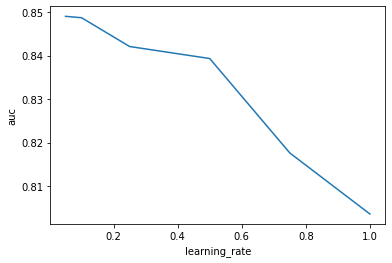

In [48]:
sns.lineplot(x=ressult_df['learning_rate'], y=ressult_df['auc'])